In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
#import neccesary libraries
%matplotlib inline

In [2]:
whale_path = Path(r"C:\Users\User\nu-chi-fin-pt-01-2021-u-c\04-Pandas\HW-04-Pandas\Instructions\Starter_Code\Resources\whale_returns.csv")
algo_path = Path(r"C:\Users\User\nu-chi-fin-pt-01-2021-u-c\04-Pandas\HW-04-Pandas\Instructions\Starter_Code\Resources\algo_returns.csv")
sp500_path = Path(r"C:\Users\User\nu-chi-fin-pt-01-2021-u-c\04-Pandas\HW-04-Pandas\Instructions\Starter_Code\Resources\sp500_history.csv")
whale_csv = pd.read_csv(whale_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
algo_csv = pd.read_csv(algo_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
sp500_csv = pd.read_csv(sp500_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
new_sp_500 = sp500_csv.sort_values('Date')
new_sp_500.head()
#define paths and read in csvs, display one to show date correct
#sort sp500 csv so its in correct order

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [3]:
#Check data type, change to float, replace $ sign with nothing to manipulate data
new_sp_500['Close'].dtype

dtype('O')

In [4]:
new_sp_500['Close'].head()

Date
2012-10-01    $1444.49
2012-10-02    $1445.75
2012-10-03    $1450.99
2012-10-04    $1461.40
2012-10-05    $1460.93
Name: Close, dtype: object

In [5]:
new_sp_500['Close'] = new_sp_500['Close'].str.replace('$', '',)
new_sp_500['Close']

<ipython-input-5-13c152c2093d>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  new_sp_500['Close'] = new_sp_500['Close'].str.replace('$', '',)


Date
2012-10-01    1444.49
2012-10-02    1445.75
2012-10-03    1450.99
2012-10-04    1461.40
2012-10-05    1460.93
               ...   
2019-04-16    2907.06
2019-04-17    2900.45
2019-04-18    2905.03
2019-04-22    2907.97
2019-04-23    2933.68
Name: Close, Length: 1649, dtype: object

In [6]:
new_sp_500['Close'].isnull().mean()

0.0

In [7]:
new_sp_500['Close'] = new_sp_500['Close'].astype('float')
new_sp_500['Close'].dtype

dtype('float64')

In [8]:
new_sp_500.head()
#double check everything

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [9]:
dreturns_sp500 = new_sp_500.pct_change()
cleaned_dreturns_sp500 = dreturns_sp500.dropna()
cleaned_dreturns_sp500
#make a daily returns variable for sp500, and clean it
#others are already in pct_change format

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [10]:
whale_csv.isnull()
cleaned_whale_csv = whale_csv.dropna()
cleaned_whale_csv.isnull().mean()
#clean the whale csv

SOROS FUND MANAGEMENT LLC      0.0
PAULSON & CO.INC.              0.0
TIGER GLOBAL MANAGEMENT LLC    0.0
BERKSHIRE HATHAWAY INC         0.0
dtype: float64

In [11]:
algo_csv.isnull().mean()
cleaned_algo_csv = algo_csv.dropna()
cleaned_algo_csv.isnull().mean()
#clean the algorithmic csv

Algo 1    0.0
Algo 2    0.0
dtype: float64

In [12]:
cleaned_dreturns_sp500.columns = ['SP500']
cleaned_dreturns_sp500.head()
#rename sp500 column head to read into others

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [13]:
combined_df = pd.concat([cleaned_dreturns_sp500, cleaned_algo_csv, cleaned_whale_csv], axis='columns', join='inner')
combined_df
#combine cleaned daily returns by column to perform analysis

,SP500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,-0.004539,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.004389,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.001196,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.014174,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.003944,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...,...,...
2019-04-16,0.000509,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837
2019-04-17,-0.002274,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222
2019-04-18,0.001579,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916


<AxesSubplot:xlabel='Date'>

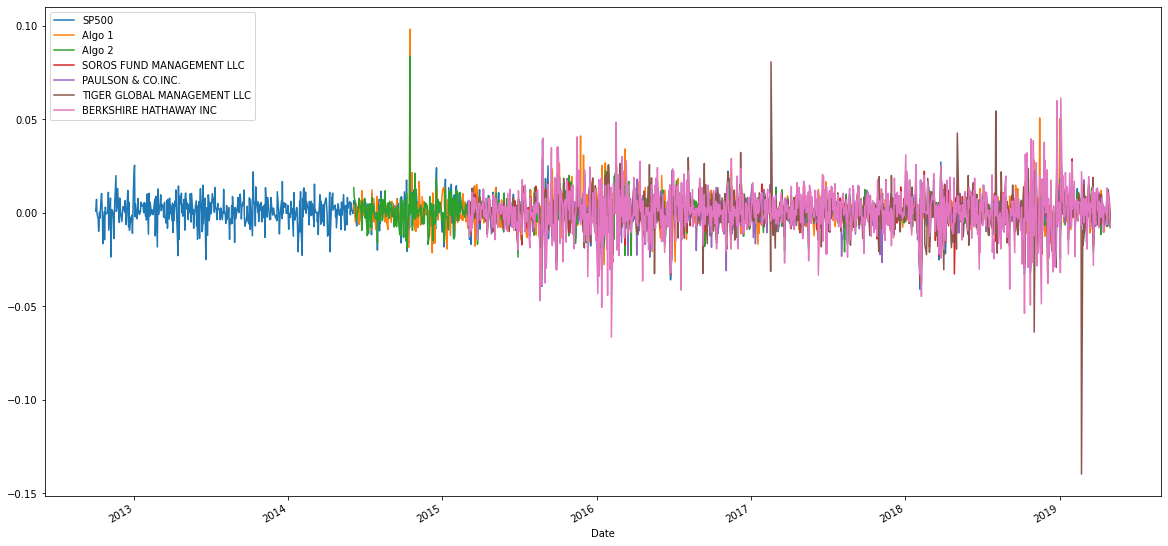

In [14]:
ax = cleaned_dreturns_sp500.plot(figsize=(20,10))
cleaned_algo_csv.plot(ax=ax)
cleaned_whale_csv.plot(ax=ax)
#plot the daily returns on same graph

In [15]:
whale_cummulative = (1 + cleaned_whale_csv).cumprod()
whale_cummulative
#cummulative returns defined and plotted for each, plotted together at the end

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431
2015-03-04,1.000962,0.998245,0.996972,0.997617
2015-03-05,1.004981,1.002314,0.999319,1.004327
2015-03-06,0.997037,0.998731,0.990844,0.991172
2015-03-09,0.997617,1.002951,0.996633,0.989534
...,...,...,...,...
2019-04-25,1.166895,0.779425,0.853324,1.550964
2019-04-26,1.176404,0.786566,0.863867,1.567147
2019-04-29,1.177880,0.788705,0.869267,1.575332


<AxesSubplot:xlabel='Date'>

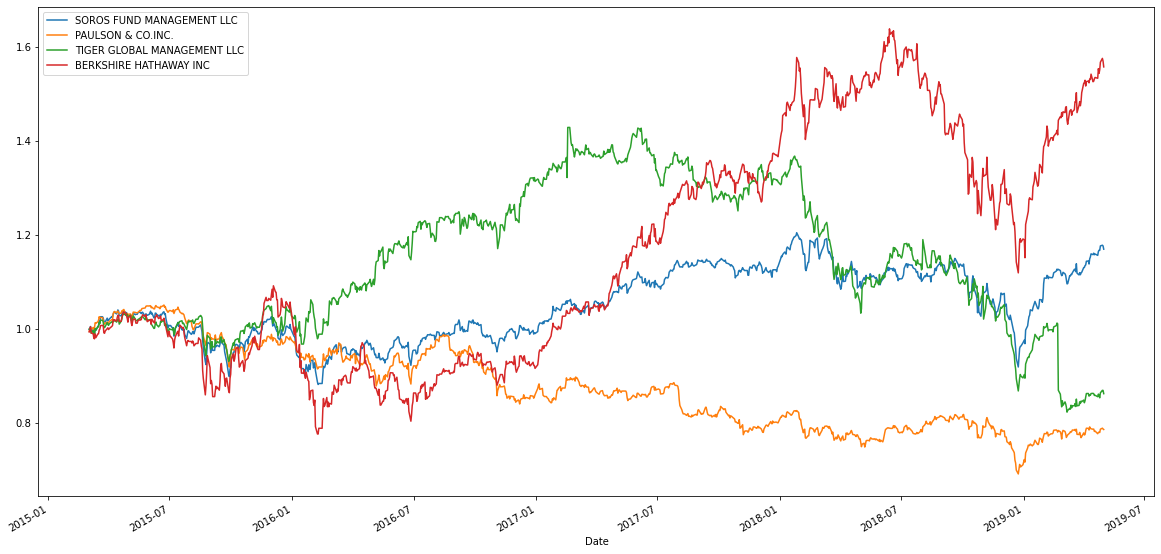

In [16]:
whale_cummulative.plot(figsize=(20,10))

In [17]:
algo_cummulative = (1 + cleaned_algo_csv).cumprod()
algo_cummulative

,Algo 1,Algo 2
Date,,
2014-06-05,1.004062,1.013285
2014-06-06,1.005927,1.021679
2014-06-09,1.000885,1.027470
2014-06-10,1.005295,1.026714
2014-06-11,1.010081,1.022852
...,...,...
2019-04-25,2.145762,1.458997
2019-04-26,2.152159,1.466665
2019-04-29,2.163367,1.470814


<AxesSubplot:xlabel='Date'>

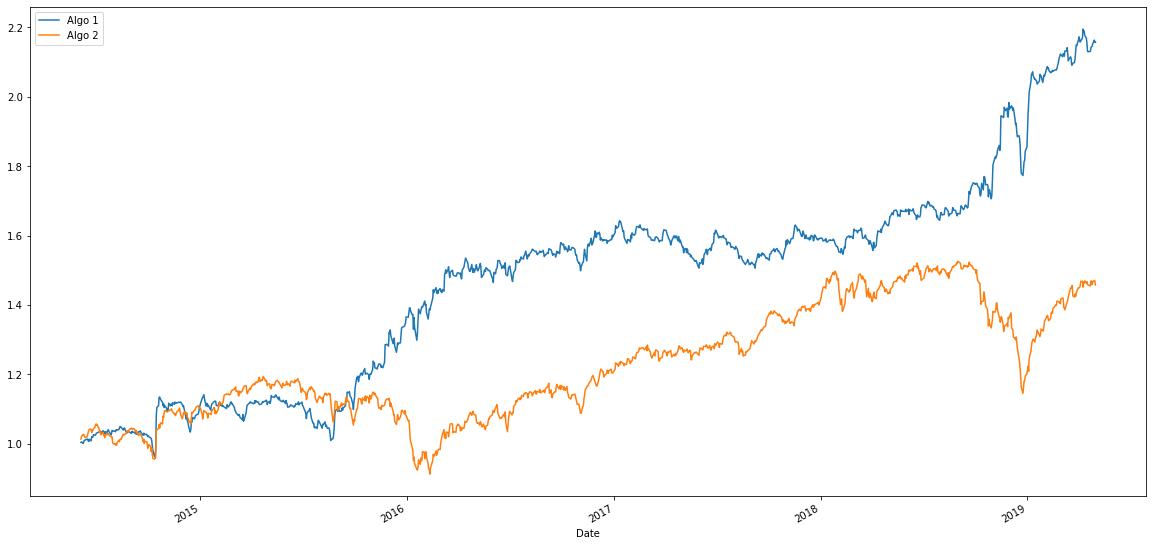

In [18]:
algo_cummulative.plot(figsize=(20,10))

In [19]:
sp500_cummulative = (1 + cleaned_dreturns_sp500).cumprod()
sp500_cummulative

,SP500
Date,
2012-10-02,1.000872
2012-10-03,1.004500
2012-10-04,1.011707
2012-10-05,1.011381
2012-10-08,1.007885
...,...
2019-04-16,2.012517
2019-04-17,2.007941
2019-04-18,2.011111


<AxesSubplot:xlabel='Date'>

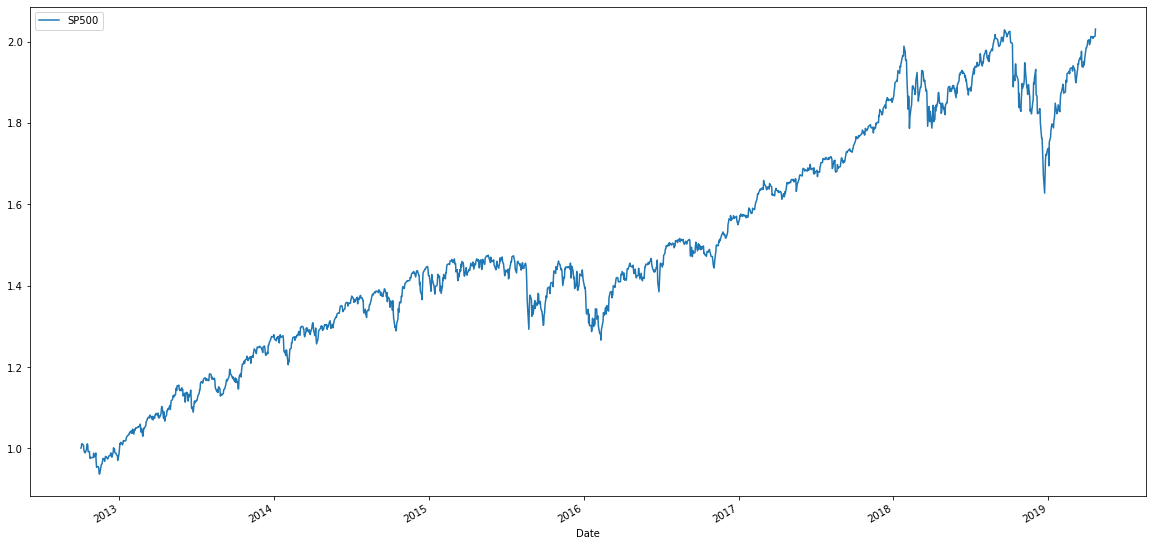

In [20]:
sp500_cummulative.plot(figsize=(20,10))

<AxesSubplot:title={'center':'All portoflio returns'}, xlabel='Date'>

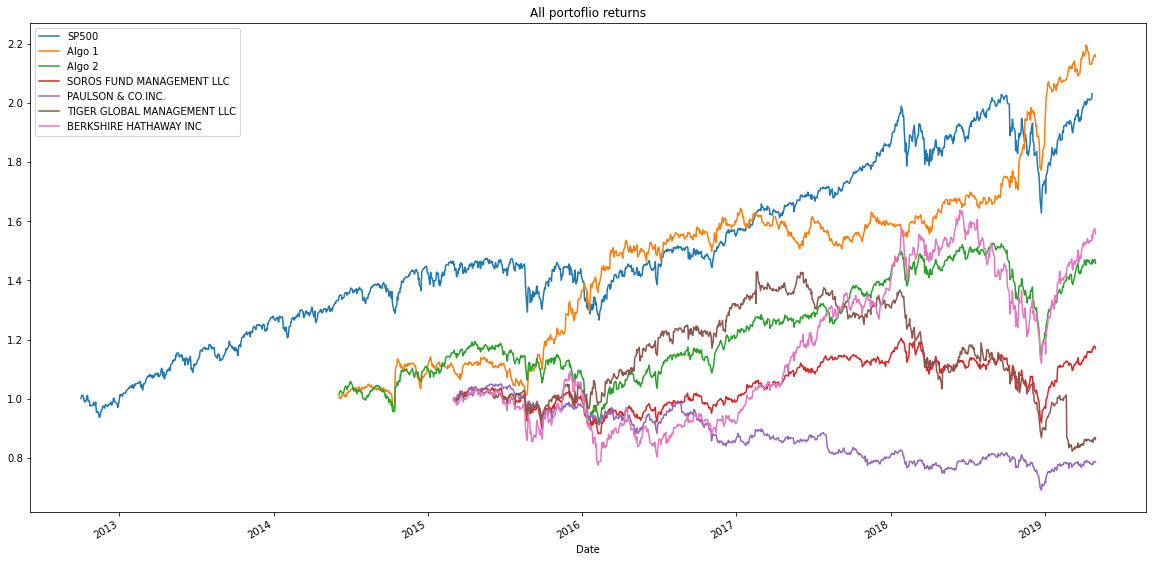

In [21]:
ax = sp500_cummulative.plot(figsize=(20,10), title='All portoflio returns')
algo_cummulative.plot(ax=ax)
whale_cummulative.plot(ax=ax)
#plot cummulative returns for different portfolios on one chart

<AxesSubplot:>

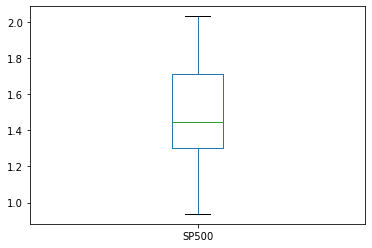

In [22]:
sp500_cummulative.plot.box()
#practice box plot for each, concat at the end to diplay all on one chart

<AxesSubplot:>

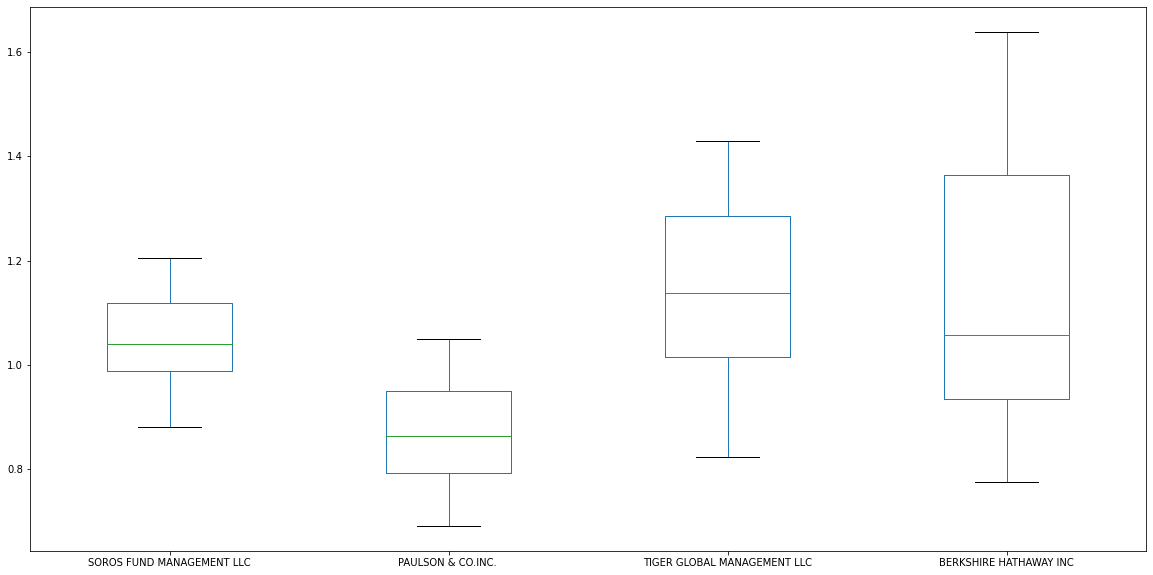

In [24]:
whale_cummulative.plot.box(figsize=(20,10))

<AxesSubplot:>

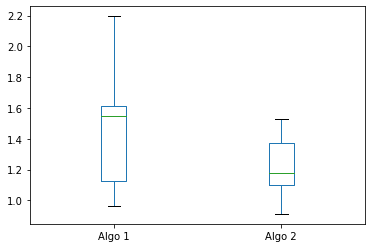

In [25]:
algo_cummulative.plot.box()

In [26]:
combined_cummulative_dreturns = pd.concat([algo_cummulative, whale_cummulative, sp500_cummulative], axis='columns', join='inner')
combined_cummulative_dreturns
#put cummulative returns in one df to show box plot

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP500
Date,,,,,,,
2015-03-03,1.104979,1.156329,0.998734,0.995019,0.999504,0.993431,1.459186
2015-03-04,1.095489,1.159122,1.000962,0.998245,0.996972,0.997617,1.452783
2015-03-05,1.094442,1.164134,1.004981,1.002314,0.999319,1.004327,1.454520
2015-03-06,1.089018,1.150792,0.997037,0.998731,0.990844,0.991172,1.433904
2015-03-09,1.083086,1.152292,0.997617,1.002951,0.996633,0.989534,1.439560
...,...,...,...,...,...,...,...
2019-04-16,2.153355,1.467349,1.160965,0.786811,0.862080,1.526861,2.012517
2019-04-17,2.131173,1.459678,1.157602,0.781723,0.858279,1.531781,2.007941
2019-04-18,2.129920,1.457884,1.159278,0.782678,0.858778,1.534716,2.011111


<AxesSubplot:>

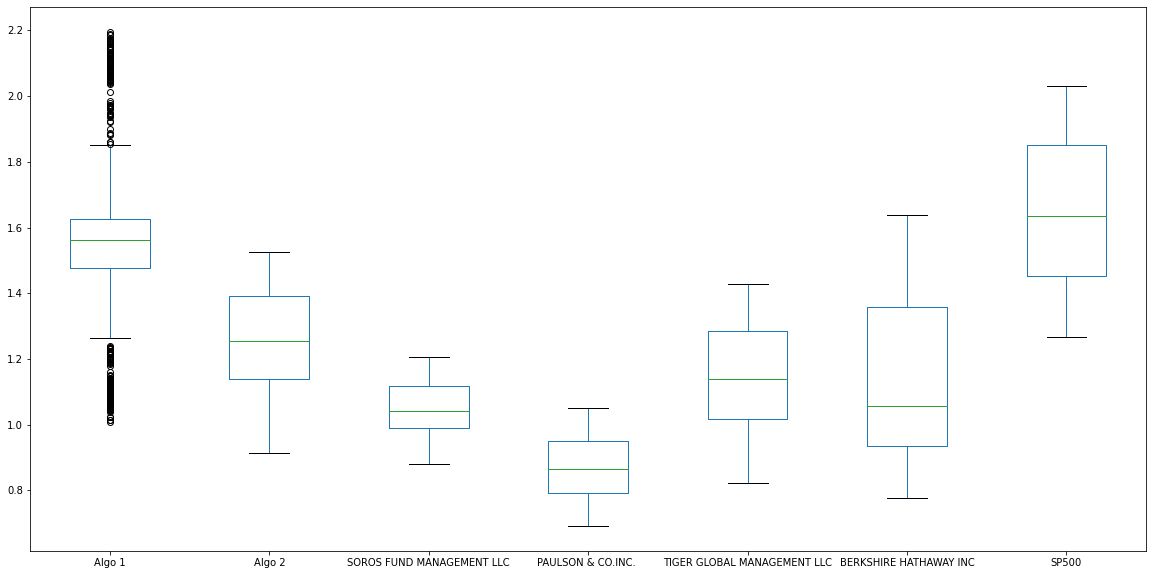

In [27]:
combined_cummulative_dreturns.plot.box(figsize=(20,10))

In [28]:
daily_std = combined_df.std()
daily_std = daily_std.sort_values(ascending=False)
daily_std
#calculate standard deviations for combined returns

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
SP500                          0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

In [29]:
annualized_std = daily_std * np.sqrt(252)
annualized_std
#find annualized std

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
SP500                          0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

In [30]:
print("Berkshire Hathaway and Tiger Global could be considered more risky than the S&P 500 having higher daily and annualized standard deviations")

Berkshire Hathaway and Tiger Global could be considered more risky than the S&P 500 having higher daily and annualized standard deviations


<AxesSubplot:xlabel='Date'>

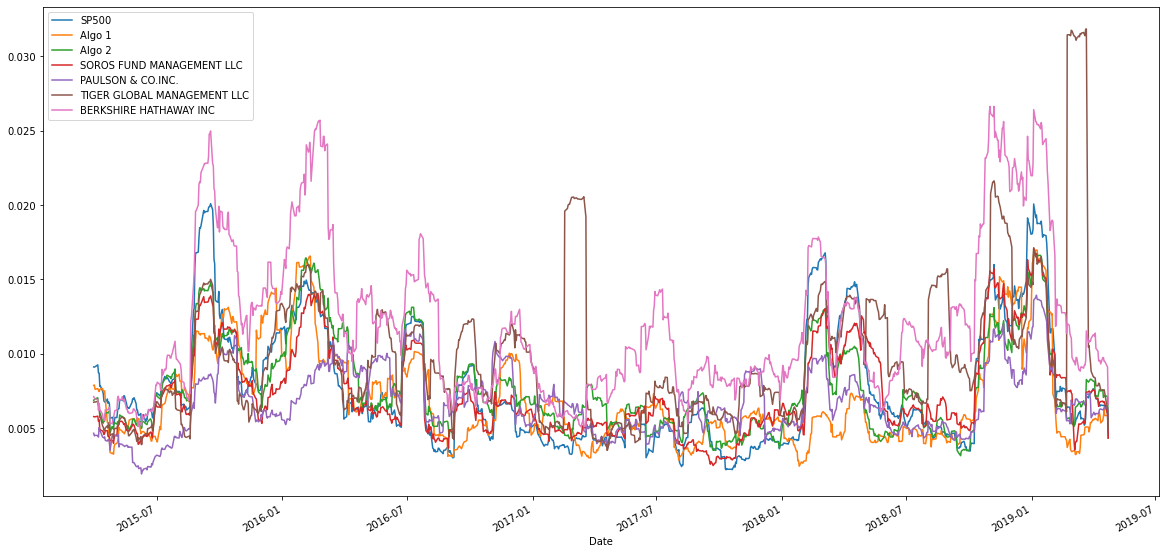

In [31]:
combined_df.rolling(window=21).std().plot(figsize=(20,10))
#Calculate and plot the rolling standard deviation for all portfolios using a 21-day window

In [32]:
correlation = combined_df.corr()
correlation

,SP500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
SP500,1.000000,0.279494,0.858764,0.837864,0.669732,0.623946,0.751371
Algo 1,0.279494,1.000000,0.288243,0.321211,0.268840,0.164387,0.292033
Algo 2,0.858764,0.288243,1.000000,0.826873,0.678152,0.507414,0.688082
SOROS FUND MANAGEMENT LLC,0.837864,0.321211,0.826873,1.000000,0.699914,0.561243,0.754360
PAULSON & CO.INC.,0.669732,0.268840,0.678152,0.699914,1.000000,0.434479,0.545623
TIGER GLOBAL MANAGEMENT LLC,0.623946,0.164387,0.507414,0.561243,0.434479,1.000000,0.424423
BERKSHIRE HATHAWAY INC,0.751371,0.292033,0.688082,0.754360,0.545623,0.424423,1.000000


<AxesSubplot:>

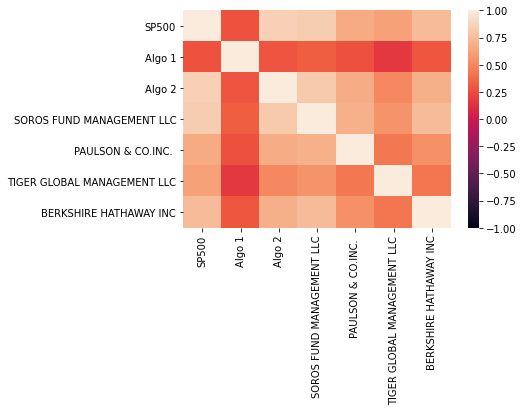

In [34]:
sns.heatmap(correlation, vmin=-1, vmax=1)
#Calculate and plot the correlation between each stock to determine which portfolios may mimick the S&P 500.

In [35]:
#Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500.
#found non rolling beta first on accident
algo1_covariance = combined_df['Algo 1'].cov(combined_df['SP500'])
algo1_covariance

1.8217749991632744e-05

In [36]:
variance = combined_df['SP500'].var()
variance

7.316632424648712e-05

In [37]:
algo1_beta = algo1_covariance / variance
algo1_beta

0.24899091459425637

In [38]:
#defining rolling beta of algo1 portoflio vs sp500
rolling_algo1_covariance = combined_df['Algo 1'].rolling(window=60).cov(combined_df['SP500'])
rolling_variance = combined_df['SP500'].rolling(window=60).var()
rolling_algo1_beta = rolling_algo1_covariance / rolling_variance
rolling_algo1_beta


Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.025920
2019-04-17    0.072232
2019-04-18    0.069934
2019-04-22    0.069525
2019-04-23    0.084337
Length: 1043, dtype: float64

<AxesSubplot:xlabel='Date'>

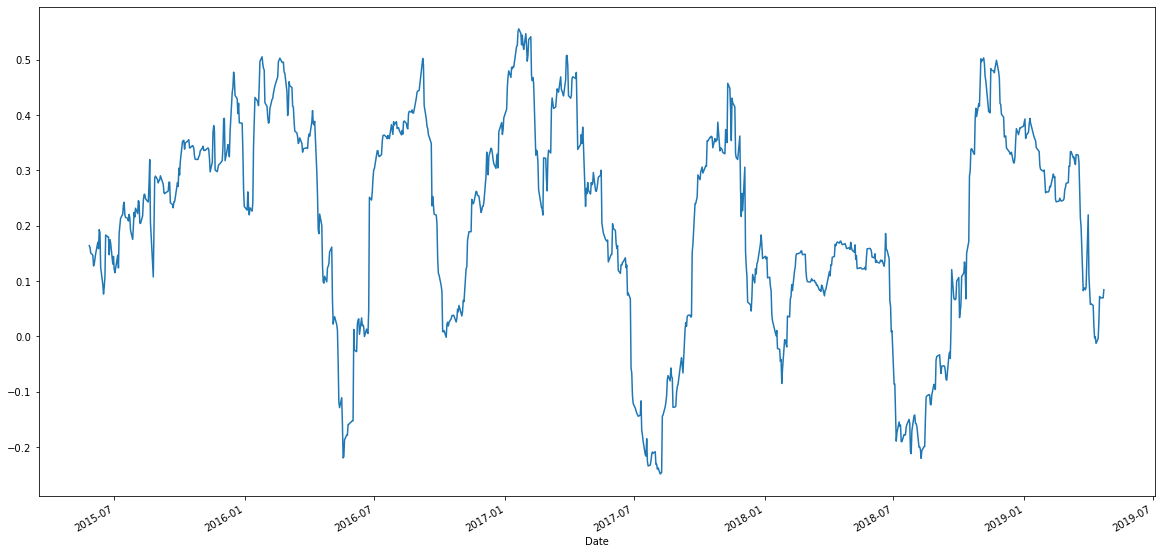

In [131]:
rolling_algo1_beta.plot(figsize=(20,10))

In [39]:
#did not get to exponentially weighted average
#Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SP500                          0.648267
Algo 1                         1.378648
Algo 2                         0.501364
SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

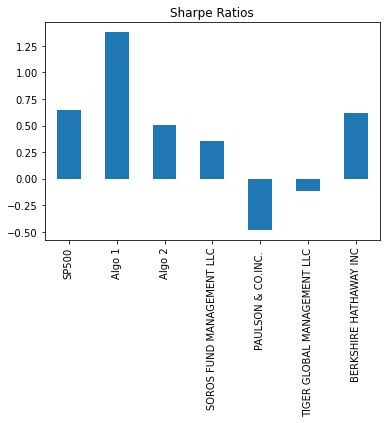

In [40]:
sharpe_ratios.plot(kind='bar', title='Sharpe Ratios')

In [41]:
tsla_path = Path(r"C:\Users\User\Desktop\TSLA prices - Sheet1.csv")
mstr_path = Path(r"C:\Users\User\Desktop\MSTR prices - Sheet1.csv")
amzn_path = Path(r"C:\Users\User\Desktop\AMZN prices - Sheet1.csv")
aapl_path = Path(r"C:\Users\User\Desktop\AAPL prices - Sheet1.csv")
tsla_prices = pd.read_csv(tsla_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
mstr_prices = pd.read_csv(mstr_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
amzn_prices = pd.read_csv(amzn_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
aapl_prices = pd.read_csv(aapl_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
mstr_prices.head()
#I chose tesla, microstrategy, amazon and apple as 4 stocks for 'custom portfolio'

,Close
Date,
2014-01-02,123.53
2014-01-03,123.26
2014-01-06,121.44
2014-01-07,122.96
2014-01-08,122.44


In [42]:
portfolio = pd.concat([tsla_prices, mstr_prices, amzn_prices, aapl_prices], axis='columns', join='inner')
portfolio.columns = ['TSLA', 'MSTR', 'AMZN', 'AAPL']
portfolio.head()
#combined custom port together and named columns

,TSLA,MSTR,AMZN,AAPL
Date,,,,
2014-01-02,30.02,123.53,397.97,19.75
2014-01-03,29.91,123.26,396.44,19.32
2014-01-06,29.40,121.44,393.63,19.43
2014-01-07,29.87,122.96,398.03,19.29
2014-01-08,30.26,122.44,401.92,19.41


In [43]:
port_daily_returns = portfolio.pct_change()
port_daily_returns.head()
#find pct_change

,TSLA,MSTR,AMZN,AAPL
Date,,,,
2014-01-02,NaN,NaN,NaN,NaN
2014-01-03,-0.003664,-0.002186,-0.003845,-0.021772
2014-01-06,-0.017051,-0.014766,-0.007088,0.005694
2014-01-07,0.015986,0.012516,0.011178,-0.007205
2014-01-08,0.013057,-0.004229,0.009773,0.006221


In [44]:
weights = [0.25, 0.25, 0.25, 0.25]
portfolio_returns = port_daily_returns.dot(weights)
portfolio_returns.head()
#define portfolio weights to make portfolio returns

Date
2014-01-02         NaN
2014-01-03   -0.007867
2014-01-06   -0.008303
2014-01-07    0.008119
2014-01-08    0.006205
dtype: float64

In [45]:
#Add your portfolio returns to the DataFrame with the other portfolios, 
#I renamed column header names for simplicity
all_data = pd.concat([combined_df, portfolio_returns], axis='columns', join='inner')
all_data.columns = ['SP500', 'Algo_1', 'Algo_2', 'Soros', 'Paulson', 'Tiger', 'Berkshire', 'Custom']
all_data.head()


,SP500,Algo_1,Algo_2,Soros,Paulson,Tiger,Berkshire,Custom
Date,,,,,,,,
2015-03-03,-0.004539,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,0.002092
2015-03-04,-0.004389,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213,-0.005434
2015-03-05,0.001196,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726,-0.009354
2015-03-06,-0.014174,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,-0.025599
2015-03-09,0.003944,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652,0.001086


In [46]:
#Run the following analyses:

#  1  * Calculate the Annualized Standard Deviation.
#  2  * Calculate and plot rolling `std` with a 21-day window.
#  3  * Calculate and plot the correlation.
#  4  * Calculate and plot beta for your portfolio compared to the S&P 60 TSX.
#  5  * Calculate the Sharpe ratios and generate a bar plot.

std_daily = all_data.std()
std_daily = std_daily.sort_values(ascending=False)
std_daily


Custom       0.014384
Berkshire    0.012919
Tiger        0.010894
SP500        0.008554
Algo_2       0.008342
Soros        0.007895
Algo_1       0.007620
Paulson      0.007023
dtype: float64

In [47]:
std_annualized = std_daily * np.sqrt(252)
std_annualized
#1 annualized standard deviation

Custom       0.228343
Berkshire    0.205077
Tiger        0.172936
SP500        0.135786
Algo_2       0.132430
Soros        0.125335
Algo_1       0.120967
Paulson      0.111488
dtype: float64

<AxesSubplot:xlabel='Date'>

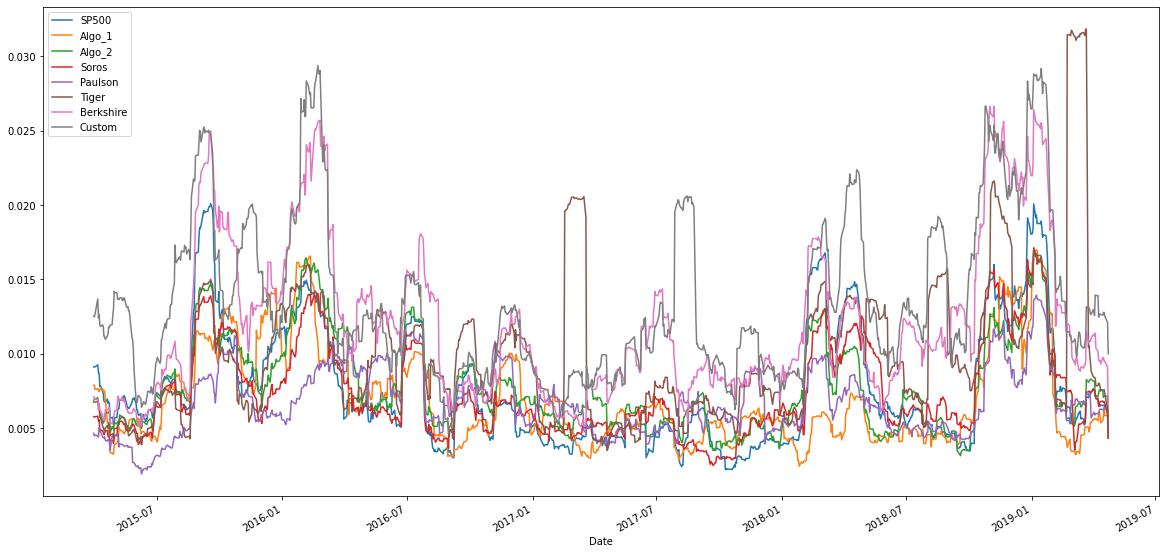

In [48]:
all_data.rolling(window=21).std().plot(figsize=(20,10))
#2 plotted rolling std in 21 day window

In [49]:
correlation = all_data.corr()
correlation.head()
#3 calculate and plot correlation

,SP500,Algo_1,Algo_2,Soros,Paulson,Tiger,Berkshire,Custom
SP500,1.000000,0.279494,0.858764,0.837864,0.669732,0.623946,0.751371,0.723877
Algo_1,0.279494,1.000000,0.288243,0.321211,0.268840,0.164387,0.292033,0.244566
Algo_2,0.858764,0.288243,1.000000,0.826873,0.678152,0.507414,0.688082,0.635373
Soros,0.837864,0.321211,0.826873,1.000000,0.699914,0.561243,0.754360,0.646297
Paulson,0.669732,0.268840,0.678152,0.699914,1.000000,0.434479,0.545623,0.474969


<AxesSubplot:>

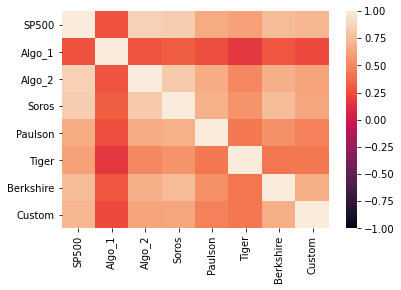

In [50]:
sns.heatmap(correlation, vmin=-1, vmax=1)

In [51]:
custom_rolling_covariance = all_data['Custom'].rolling(window=60).cov(all_data['SP500'])
custom_rolling_covariance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.000053
2019-04-17    0.000049
2019-04-18    0.000049
2019-04-22    0.000049
2019-04-23    0.000048
Length: 1043, dtype: float64

In [52]:
variance_2 = all_data['SP500'].rolling(window=60).var()
variance_2

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.000041
2019-04-17    0.000037
2019-04-18    0.000037
2019-04-22    0.000037
2019-04-23    0.000037
Name: SP500, Length: 1043, dtype: float64

In [53]:
custom_port_beta = custom_rolling_covariance / variance_2
custom_port_beta
#beta for custom portfolio

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    1.287272
2019-04-17    1.301653
2019-04-18    1.304176
2019-04-22    1.305944
2019-04-23    1.289689
Length: 1043, dtype: float64

<AxesSubplot:xlabel='Date'>

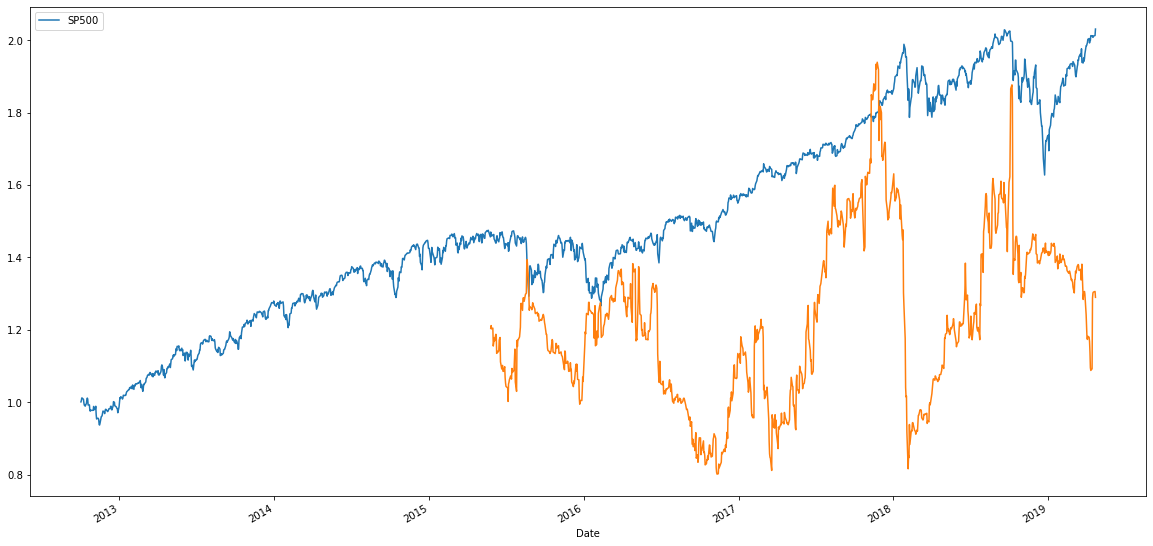

In [54]:
#4 Calculate and plot beta for your portfolio compared to the S&P 60 TSX
ax = sp500_cummulative.plot(figsize=(20,10))
custom_port_beta.plot(ax=ax)
#wasnt sure if just 'custom_port_beta.plot(figsize=(20,10))' was sufficient for answer so I included sp500 chart. Was confused by wording of question

In [55]:
port_sharpe_ratios = (all_data.mean() * 252) / (all_data.std() * np.sqrt(252))
port_sharpe_ratios
#5 calculate annualized sharpe ratios and plot on a bar graph

SP500        0.648267
Algo_1       1.378648
Algo_2       0.501364
Soros        0.356417
Paulson     -0.483570
Tiger       -0.121060
Berkshire    0.621810
Custom       0.824332
dtype: float64

<AxesSubplot:title={'center':'Varying Sharpe Ratios'}>

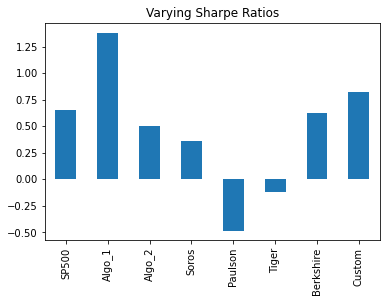

In [56]:
port_sharpe_ratios.plot(kind='bar', title='Varying Sharpe Ratios')